TESTED FEATURES: 
Index(['vel5', 'vel10', 'vel15', 'vel30', 'vel60', 'acc5', 'acc10', 'acc15',
       'acc30', 'acc60', 'stoch12', 'stochDiff6012', 'RSIhl_diff',
       'RSIhl_diffROC', 'vol', 'vol10', 'vol15', 'vol30', 'vol60', 'volD10',
       'volD15', 'volD30', 'volD60', 'vpm5', 'vpm10', 'vpm15', 'vpm30',
       'vpm60', 'ToD', 'DoW', 'MO', 'Dr3_Model'],
      dtype='object')
TESTING FOR: 
Dr3
X shape == (100892, 6, 32).
y shape == (100892,).
-4.37072387266991e-05
0.7434901898019355
1509/1509 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


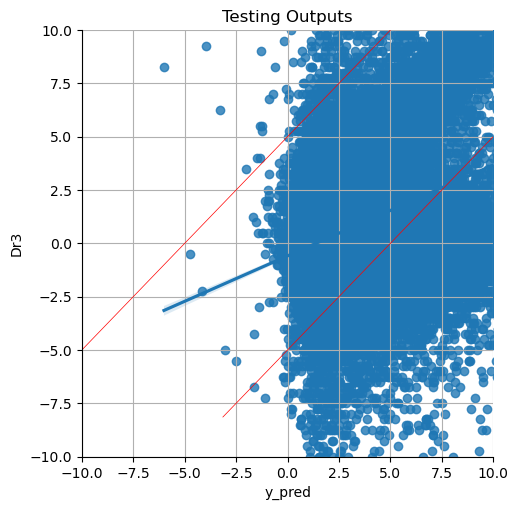

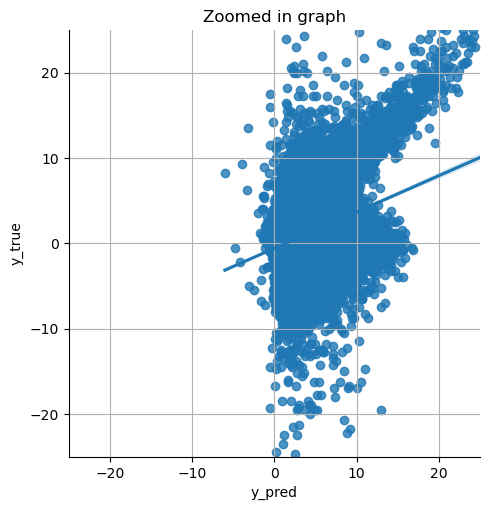

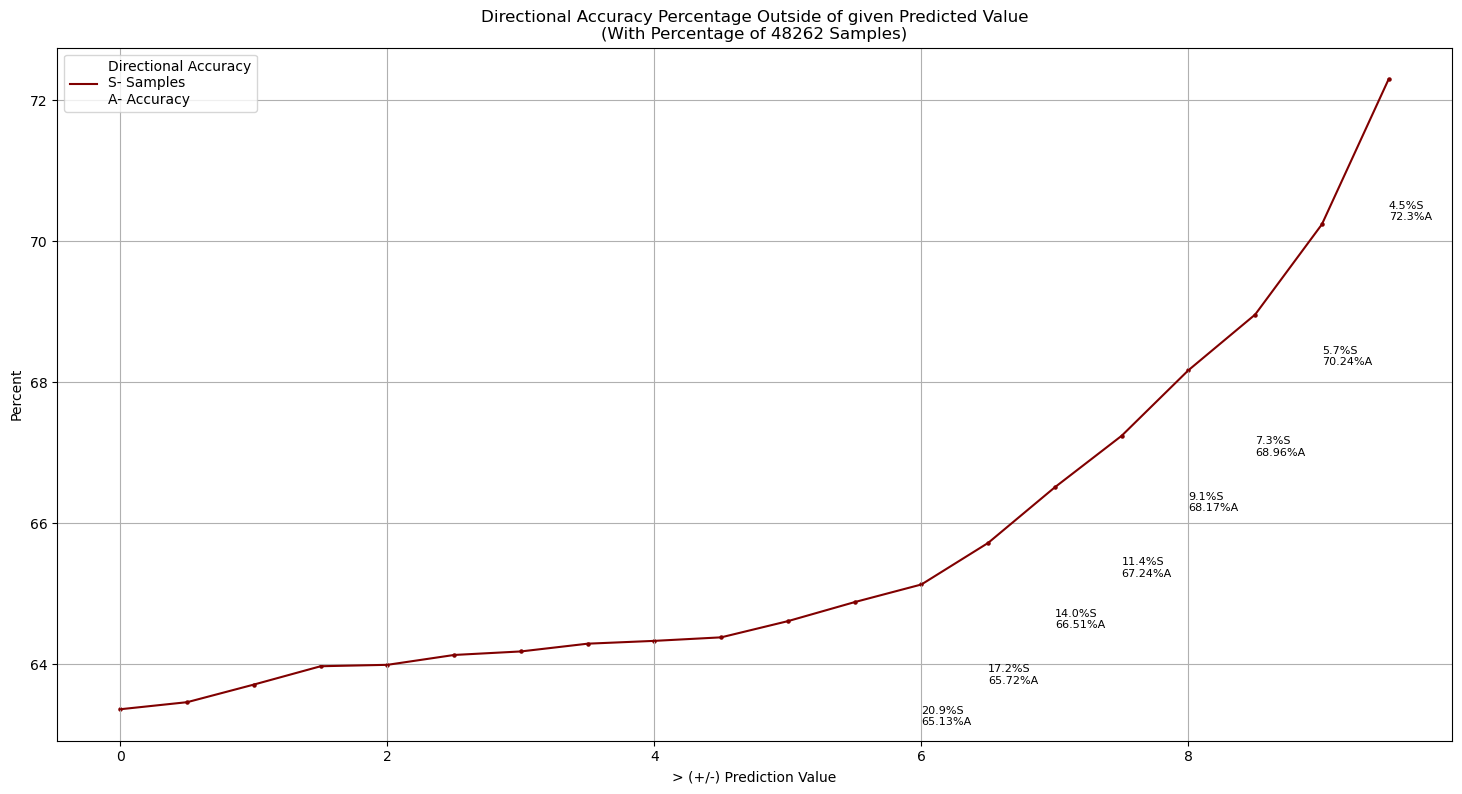

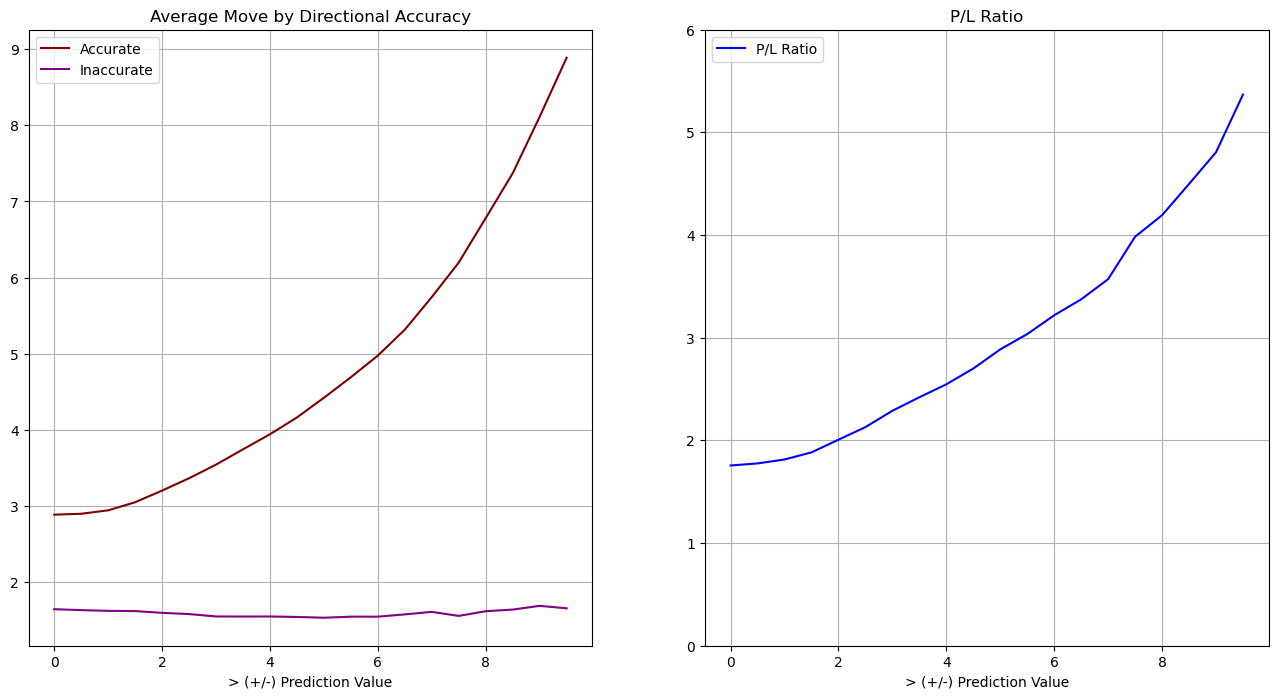

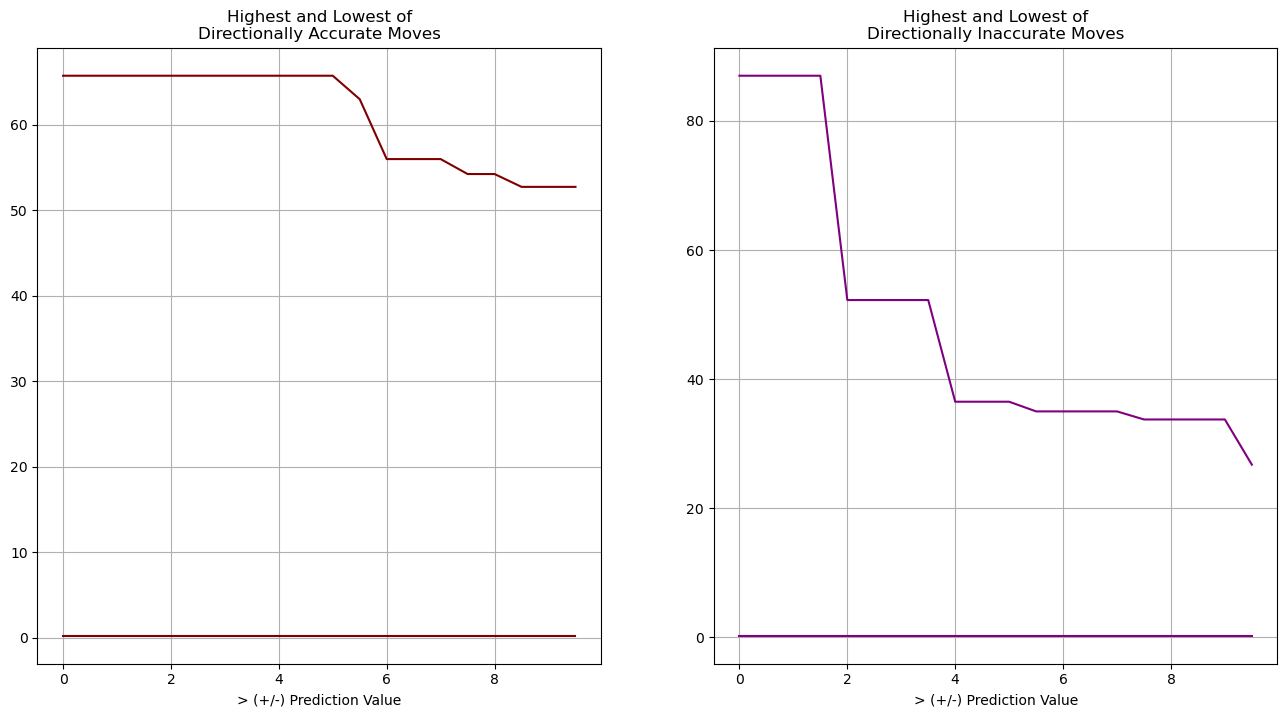

In [15]:
#JJ McCauley + LOGAN KELSCH 
#TEST NN 1

#IMPORT LIBRARIES-------------------------------------------------------

import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from keras.optimizers import SGD
from keras.initializers import GlorotUniform
from keras.initializers import RandomNormal
from keras.callbacks import EarlyStopping
from imblearn.over_sampling import SMOTE

#hahaha dont turn this on with high epoch or else
#tf.config.experimental.set_memory_growth

#LOAD DATA FROM CSV-------------------------------------------------------

# Load the dataset
data = pd.read_csv('catted_1_Dr3Model.csv')
dataTRAIN = pd.read_csv('catted_1_Dr3Model.csv')

#      'Dr1' 'Dr3' 'Mr1' 'Mr3' 
testFor = 'Dr3'
timeSteps = 6
tType = testFor[0]
#testing random feature drops
#TREND
'''
data = data.drop(columns='FT')
data = data.drop(columns='FT.1')
data = data.drop(columns='FT.2')
data = data.drop(columns='YM_diff')
data = data.drop(columns='NQ_diff')
data = data.drop(columns='volNQdiff')
data = data.drop(columns='volYMdiff')
dataTRAIN = dataTRAIN.drop(columns='FT')
dataTRAIN = dataTRAIN.drop(columns='FT.1')
dataTRAIN = dataTRAIN.drop(columns='FT.2')
dataTRAIN = dataTRAIN.drop(columns='YM_diff')
dataTRAIN = dataTRAIN.drop(columns='NQ_diff')
dataTRAIN = dataTRAIN.drop(columns='volNQdiff')
dataTRAIN = dataTRAIN.drop(columns='volYMdiff')
'''
'''
data = data.drop(columns='vol60')
data = data.drop(columns='volD10')
data = data.drop(columns='volD15')
data = data.drop(columns='volD30')
data = data.drop(columns='volD60')
data = data.drop(columns='vpm5')
data = data.drop(columns='vpm10')
data = data.drop(columns='vpm15')
data = data.drop(columns='vpm30')
data = data.drop(columns='vpm60')
data = data.drop(columns='acc30')
data = data.drop(columns='acc60')
dataTRAIN = dataTRAIN.drop(columns='vol60')
dataTRAIN = dataTRAIN.drop(columns='volD10')
dataTRAIN = dataTRAIN.drop(columns='volD15')
dataTRAIN = dataTRAIN.drop(columns='volD30')
dataTRAIN = dataTRAIN.drop(columns='volD60')
dataTRAIN = dataTRAIN.drop(columns='vpm5')
dataTRAIN = dataTRAIN.drop(columns='vpm10')
dataTRAIN = dataTRAIN.drop(columns='vpm15')
dataTRAIN = dataTRAIN.drop(columns='vpm30')
dataTRAIN = dataTRAIN.drop(columns='vpm60')
dataTRAIN = dataTRAIN.drop(columns='acc30')
dataTRAIN = dataTRAIN.drop(columns='acc60')
'''
data = data.drop(columns='FT')
dataTRAIN = dataTRAIN.drop(columns='FT')
#CALENDAR
#--------------------------------------
#SOLUTION------------------------------
data = data.drop(columns=['Mc1','Mc3','Dc1','Dc3'])
dataTRAIN = dataTRAIN.drop(columns=['Mc1','Mc3','Dc1','Dc3'])
match testFor:
    case 'Dr1':
        data = data.drop(columns='Dr3')
        data = data.drop(columns='Mr1')
        data = data.drop(columns='Mr3')
        dataTRAIN = dataTRAIN.drop(columns='Dr3')
        dataTRAIN = dataTRAIN.drop(columns='Mr1')
        dataTRAIN = dataTRAIN.drop(columns='Mr3')
    case 'Dr3':
        data = data.drop(columns='Dr1')
        data = data.drop(columns='Mr1')
        data = data.drop(columns='Mr3')
        dataTRAIN = dataTRAIN.drop(columns='Dr1')
        dataTRAIN = dataTRAIN.drop(columns='Mr1')
        dataTRAIN = dataTRAIN.drop(columns='Mr3')
    case 'Mr1':
        data = data.drop(columns='Dr1')
        data = data.drop(columns='Dr3')
        data = data.drop(columns='Mr3')
        dataTRAIN = dataTRAIN.drop(columns='Dr1')
        dataTRAIN = dataTRAIN.drop(columns='Dr3')
        dataTRAIN = dataTRAIN.drop(columns='Mr3')
    case 'Mr3':
        data = data.drop(columns='Dr1')
        data = data.drop(columns='Dr3')
        data = data.drop(columns='Mr1')
        dataTRAIN = dataTRAIN.drop(columns='Dr1')
        dataTRAIN = dataTRAIN.drop(columns='Dr3')
        dataTRAIN = dataTRAIN.drop(columns='Mr1')


#confirming X and Y features post training
Xfeatures = data.columns[:-1]
Yfeatures = data.columns[-1]
print("TESTED FEATURES: ")
print(Xfeatures)
print("TESTING FOR: ")
print(Yfeatures)

# Separate features and target
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

XTRAIN = dataTRAIN.iloc[:, :-1].values
yTRAIN = dataTRAIN.iloc[:, -1].values

# Standardize the features
scaler1 = StandardScaler()
scaler2 = RobustScaler()
scaler3 = MinMaxScaler(feature_range=(-1,1))

percFit = 0.8
fitSplit = len(X)//(1/(percFit))
negFitSplit = len(X)//(1/(1-percFit))

scaler1.fit(XTRAIN)
XTRAIN = scaler1.transform(XTRAIN)
#scaler2.fit(XTRAIN)
#XTRAIN = scaler2.transform(XTRAIN)
#scaler3.fit(XTRAIN)
#XTRAIN = scaler3.transform(XTRAIN)
X = scaler1.transform(X)
#X = scaler2.transform(X)
#X = scaler3.transform(X)
#scaler3.fit(XTRAIN)


#X = scaler3.transform(X)

#setting data for LSTM
def reformat_to_lstm(X, time_steps=timeSteps):
    X_lstm, y_lstm = [], []
    
    for i in range(time_steps, len(X)):
        # Collect previous time_steps rows for X
        X_lstm.append(X[i-time_steps:i])  
        # The corresponding y value for the last time step in the sequence
    
    X_lstm = np.array(X_lstm)
    
    return X_lstm

X = reformat_to_lstm(X, timeSteps)
y = y[timeSteps:]
y = np.array(y)

XTRAIN = reformat_to_lstm(XTRAIN, timeSteps)
yTRAIN = yTRAIN[timeSteps:]
yTRAIN = np.array(yTRAIN)

print('X shape == {}.'.format(X.shape))
print('y shape == {}.'.format(y.shape))


mos = X[:, timeSteps-1, len(Xfeatures)-1].mean()
print(mos)

def remove_zero_mo_samples(X, y):
    # Get the 'MO' column (index 34 for 0-based indexing) for all time steps and samples
    non_zero_indices = (X[:, timeSteps-1, len(Xfeatures)-1] >= 0)
    # Filter X and y using these indices
    X_filtered = X[non_zero_indices]
    y_filtered = y[non_zero_indices]
    return X_filtered, y_filtered

def remove_extra_filter(X, y):
    
    indices = (X[:, timeSteps-1, len(Xfeatures)-3] >= -0.31415)#-3 is ToD, -pi/10 is open

    X = X[indices]
    y = y[indices]

    indices = (X[:, timeSteps-1, len(Xfeatures)-3] <= 0.04317)#-3 is ToD, this value is 12:00pm

    X = X[indices]
    y = y[indices]

    return X, y

X, y = remove_zero_mo_samples(X, y)
#X, y = remove_extra_filter(X, y)
#XTRAIN, yTRAIN = remove_zero_mo_samples(XTRAIN, yTRAIN)

mos = X[:, timeSteps-1, len(Xfeatures)-1].mean()
print(mos)

loaded_model = tf.keras.models.load_model('LSTM_Dr3_6step_11_morn.keras')
loaded_model.compile(optimizer='adam',
                  loss='mse'
                  ,metrics=['R2Score','root_mean_squared_error'])

#predicting the test set results
y_pred = loaded_model.predict(X) 

import seaborn as sns
y_pred = np.squeeze(y_pred)
y = np.squeeze(y)
ys = pd.DataFrame({"y_pred":y_pred,"y_true":y})
#data.insert(1, "y_pred", y_pred, True)
# plot 1 with axes level-plot
g = sns.lmplot(data=ys,x="y_pred", y="y_true")#, hue="MO")

#plt.scatter(y_pred, y, s=1)
plt.axis('tight')
plt.grid()
plt.title('Testing Outputs')
plt.xlabel('y_pred')
plt.ylabel(testFor)

# Get the current axes from the lmplot
ax = plt.gca()

# Define the limits for the line (should cover the same range as your plot)
x_vals = np.array(ax.get_xlim())
y_vals = x_vals  # Since y = x

# Plot the y=x line
plt.plot(x_vals+5, y_vals, '-', color='red', label='y = x', linewidth=0.5)
plt.plot(x_vals-5, y_vals, '-', color='red', label='y = x', linewidth=0.5)

match tType:
    case 'D':
        plt.xlim(-10,10)
        plt.ylim(-10,10)
    case _:
        plt.xlim(0,5)
        plt.ylim(0,5)
plt.show()

g = sns.lmplot(data=ys,x="y_pred", y="y_true")#,hue="MO")
plt.title('Zoomed in graph')
plt.grid()
plt.xlim(-25,25)
plt.ylim(-25,25)
plt.show()

#DIRECTIONAL ACCURACY #DIRECTIONAL ACCURACY  #DIRECTIONAL ACCURACY  #DIRECTIONAL ACCURACY  #DIRECTIONAL ACCURACY  
specGuess = 10
specAcc = []
valCount = []
sameDirAvg = []
sameDirMax = []
sameDirMin = []
diffDirAvg = []
diffDirMax = []
diffDirMin = []
for v in range(0,specGuess*2):
    tp, fp, tn, fn = 0, 0, 0, 0
    tp5, fp5, tn5, fn5 = 0, 0, 0, 0
    valCnt = 0
    sameTmp = []
    diffTmp = []
    y_pred = ys['y_pred']
    y_test = ys['y_true']
    for i in range(len(y_pred)):
        if(y_pred[i]>=(v/2)):
            valCnt+=1
            if(y_test[i]>0):
                tp5+=1
                sameTmp.append(abs(y_test[i]))
            if(y_test[i]<0):
                fp5+=1
                diffTmp.append(abs(y_test[i]))
        if(y_pred[i]<=-(v/2)):
            valCnt+=1
            if(y_test[i]<0):
                tn5+=1
                sameTmp.append(abs(y_test[i]))
            if(y_test[i]>0):
                fn5+=1
                diffTmp.append(abs(y_test[i]))
    if((tp5+fp5+tn5+fn5)<1):
        break

    if(len(sameTmp)!=0):
        sameDirAvg.append(np.average(sameTmp))
        sameDirMax.append(np.max(sameTmp))
        sameDirMin.append(np.min(sameTmp))
    else:
        sameDirAvg.append(0.1)
        sameDirMax.append(0.1)
        sameDirMin.append(0.1)
    if(len(diffTmp)!=0):
        diffDirAvg.append(np.average(diffTmp))
        diffDirMax.append(np.max(diffTmp))
        diffDirMin.append(np.min(diffTmp))
    else:
        diffDirAvg.append(0.1)
        diffDirMax.append(0.1)
        diffDirMin.append(0.1)
    directionalAccuracy5guess = ((tp5+tn5)/(tp5+fp5+tn5+fn5))*10000//1/100
    specAcc.append(directionalAccuracy5guess)
    valCount.append(valCnt)
    #print(f'Directional Accuracy >(+/-){v/2}:\t',directionalAccuracy5guess)
#print('Directional Accuracy:\t\t',directionalAccuracy)
valCount = [x / valCount[0] * 100 for x in valCount]
plt.figure(figsize=(18, 9))
plt.plot(np.arange(0,0.5*len(specAcc),0.5), specAcc, 'maroon', label='Directional Accuracy')
plt.scatter(np.arange(0,0.5*len(specAcc),0.5), specAcc, s=5, color='maroon')
#plt.plot(np.arange(0,0.5*len(specAcc),0.5), valCount, 'r', label='% Of Samples')
plt.title(f'Directional Accuracy Percentage Outside of given Predicted Value\n(With Percentage of {len(X)} Samples)')
plt.xlabel('> (+/-) Prediction Value')
plt.ylabel('Percent')
plt.grid()
plt.legend(['Directional Accuracy\nS- Samples\nA- Accuracy'], loc='upper left')
for x, y in zip(np.arange(0,0.5*len(specAcc),0.5), specAcc):
    plt.annotate(f'{float(valCount[int(x*2)]*10//1/10)}%S\n{float(specAcc[int(x*2)])}%A', color='black', xy=(x, y-2), fontsize=8)
plt.show()

plt.figure(figsize=(16, 8))
plt.subplot(1,2,1)
plt.title('Average Move by Directional Accuracy')
plt.xlabel('> (+/-) Prediction Value')
plt.plot(np.arange(0,0.5*len(specAcc),0.5), sameDirAvg, 'maroon', label='Directional Accuracy')
plt.plot(np.arange(0,0.5*len(specAcc),0.5), diffDirAvg, 'purple', label='Directional Accuracy')
plt.grid()
plt.legend(['Accurate','Inaccurate'], loc='upper left')
plt.subplot(1,2,2)
plt.title('P/L Ratio')
plt.xlabel('> (+/-) Prediction Value')
plt.grid()
plt.plot(np.arange(0,0.5*len(specAcc),0.5),np.divide(sameDirAvg,diffDirAvg), 'blue')
plt.legend(['P/L Ratio'], loc='upper left')
plt.ylim(0,6)
plt.show()
plt.figure(figsize=(16, 8))
plt.subplot(1,2,1)
plt.title('Highest and Lowest of\nDirectionally Accurate Moves')
plt.xlabel('> (+/-) Prediction Value')
plt.plot(np.arange(0,0.5*len(specAcc),0.5), sameDirMax, 'maroon', label='Directional Accuracy')
plt.plot(np.arange(0,0.5*len(specAcc),0.5), sameDirMin, 'maroon', label='Directional Accuracy')
plt.grid()
plt.subplot(1,2,2)
plt.title('Highest and Lowest of\nDirectionally Inaccurate Moves')
plt.xlabel('> (+/-) Prediction Value')
plt.plot(np.arange(0,0.5*len(specAcc),0.5), diffDirMax, 'purple', label='Directional Accuracy')
plt.plot(np.arange(0,0.5*len(specAcc),0.5), diffDirMin, 'purple', label='Directional Accuracy')
plt.grid()
plt.show()

In [ ]:
data.corr()
#print(X.shape)

In [4]:
catReform = pd.read_csv('catted_12day.csv')
print(y_pred)
print((y_pred.shape))
#y_pred = y_pred.to_numpy()
print(type(y_pred))
y_pred = np.insert(y_pred, 0, 0, axis=0)
y_pred = np.insert(y_pred, 0, 0, axis=0)
y_pred = np.insert(y_pred, 0, 0, axis=0)
y_pred = np.insert(y_pred, 0, 0, axis=0)
y_pred = np.insert(y_pred, 0, 0, axis=0)
#y_pred = np.append(y_pred, -1, 0, axis=0)
y_pred = pd.Series(y_pred)
catReform['Dr3_Model'] = y_pred
print(catReform.tail(5))
catReform.to_csv('catted_12day_Dr3Model.csv')

0       2.084353
1       0.025369
2       7.009391
3       6.450147
4       3.973774
          ...   
3333    3.246205
3334    4.664523
3335    2.991430
3336    4.215136
3337    3.782758
Name: y_pred, Length: 3338, dtype: float32
(3338,)
<class 'pandas.core.series.Series'>
                 FT    vel5   vel10   vel15   vel30   vel60    acc5   acc10  \
3339  1729642500000  0.0127 -0.0064 -0.0141 -0.0028  0.0060  0.0382  0.0064   
3340  1729642800000 -0.0085  0.0021 -0.0071 -0.0064  0.0021 -0.0212  0.0297   
3341  1729643100000  0.0085  0.0000  0.0042 -0.0064  0.0025  0.0170  0.0064   
3342  1729643400000 -0.0127 -0.0021 -0.0042 -0.0092 -0.0004 -0.0212 -0.0042   
3343  1729643700000 -0.0127 -0.0127 -0.0057 -0.0064 -0.0011 -0.0000 -0.0127   

       acc15   acc30  ...   MO  Dc1  Dc3   Dr1   Dr3  Mc1  Mc3     Mr1  \
3339 -0.0226 -0.0177  ...  0.0   dn   dn -0.50 -0.75   nm   nm  0.4773   
3340 -0.0014 -0.0170  ...  0.0   up   dn  0.50 -1.00   nm   nm  0.5178   
3341  0.0212 -0.0177  ...  0.

In [33]:
y_pred = pd.Series(y_pred)
catReform['Dr3_Model'] = y_pred
print(catReform.tail(5))
catReform.to_csv('catted_1_.csv')

                  FT    vel5   vel10   vel15   vel30   vel60    acc5   acc10  \
100899  1.728075e+12 -0.0043  0.0043 -0.0043 -0.0101 -0.0061 -0.0173  0.0280   
100900  1.728252e+12  0.1596  0.0776  0.0561  0.0201  0.0093  0.1639  0.0820   
100901  1.728252e+12  0.0301  0.0949  0.0618  0.0252  0.0093 -0.1295  0.0906   
100902  1.728253e+12  0.0172  0.0237  0.0690  0.0323  0.0108 -0.0129 -0.0540   
100903  1.728253e+12 -0.0043  0.0065  0.0144  0.0352  0.0122 -0.0215 -0.0884   

         acc15   acc30  ...   MO  Dc1  Dc3   Dr1    Dr3  Mc1  Mc3      Mr1  \
100899  0.0115 -0.0079  ...  0.0   up   up  9.25  12.00   mv   mv  11.3884   
100900  0.0719  0.0216  ...  0.0   up   up  1.75   2.50   nm   nm   0.4739   
100901  0.0733  0.0316  ...  0.0   up   dn  1.00  -1.25   nm   nm   0.2733   
100902  0.0733  0.0431  ...  0.0   dn   dn -0.25   0.00   nm   nm   0.0728   
100903 -0.0417  0.0460  ...  0.0   dn   dn -2.00  -4.00   mv   mv   0.6062   

           Mr3  Dr3_Model  
100899  3.4622   4.053

In [5]:
catReform.to_csv('catted_12day_Dr3Model.csv',index=False)

In [9]:
dataPolish = pd.read_csv('catted_12day_Dr3Model.csv')
cols = ['FT','vel5','vel10','vel15','vel30','vel60','acc5','acc10','acc15','acc30','acc60','stoch12','stochDiff6012','RSIhl_diff','RSIhl_diffROC','vol','vol10','vol15','vol30','vol60','volD10','volD15','volD30','volD60','vpm5','vpm10','vpm15','vpm30','vpm60','ToD','DoW','MO','Dr3_Model','Dr3','Dc1','Dc3','Dr1','Mc1','Mc3','Mr1','Mr3']
dataPolish = dataPolish.reindex(columns=cols)
#dataPolish = dataPolish.drop(columns=['YM_diff','NQ_diff','volNQdiff','volYMdiff'])
dataPolish.to_csv('catted_12day_Dr3Model.csv',index=False)